# Projet Bank Marketing - DA

## I.Introduction
### a. Contexte
Lors d'une campagne de Marketing d'une banque, l'analyse des données est une problématique très classique dans les entreprises de service, pour ce faire, j'ai pris sur un jeu de données, des données personnelles sur des clients d'une banque qui ont été "télémarketés" pour soucrire à un produit que l'on appelle un "dépôt à terme". Le but est lorsqu'un client souscrit à ce produit, il place une quantité d'argent dans un compte spécifique et ne pourra pas toucher ces fonds avant l'expiration du terme. En échange, le client reçoit des intérêts de la part de la banque à la fin du terme.

### b. Objectifs et enjeux
Trouvez les meilleures stratégies à améliorer pour la campagne marketing. Comment l'institution financière peut-elle avoir une plus grande efficacité pour les futures campagnes marketing ?

Les enjeux sont d'effectuer une analyse visuelle et statistique des facteurs pouvant expliquer le lien entre les données personnelles du client (âge, statut marital, quantité d'argent placé dans la banque, nombre de fois que le client a été contacté, etc.) et la variable cible "Est-ce que le client a souscrit au dépôt à terme ?"

Ceci se fera en quatre parties : 
- Exploration de données : data processing, data cleaning, visualisation des données, tests statistiques.
- L'analyse visuelle : utilisation des techniques de machine learning pour déterminer à l'avance si un client va souscrire au produit ou non.
- Prédiction : utilisation des techniques d'interprétabilité des modèles de machine learning pour expliquer à l'échelle d'un individu pourquoi il est plus susceptible de souscrira au produit ou non.
- L'interprétabilité du modèle : conclusion de mon analyse.

In [17]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

# Charger les données
df = pd.read_csv('BankFull.csv', sep=";")

## II. Exploration des données
### a. Présentation du DataSet
Pour mon étude, je dispose d'une source de données :
Le jeu provient du site Kaggle (). Il s'agit d'un unique fichier csv qui recense différentes informations au sujet des clients qui ont été contactés lors des différentes campagnes de télémarketing.
### b. Variables
Je commence l'exploration du DataSet, qui sera nommé df.
Celui-ci comporte 45211 lignes et 17 variables. 



Sur l'ensemble des 17 variables de df, il y a :
- 16 variables explicatives (12 catégorielles + 4 quantitatives). Elles correspondent aux informations des clients qui ont été contactés par l'une des campagnes d'appels téléphonique.
- 1 variable cible (catégorielle) "y". Elle indique si le client a souscrit ou non au produit de placement financier.

Toutes les variables de df sont aisément compréhenssibles, et il n'y aucune valeurs manquantes, ni de doublon dans le DataSet.

In [2]:
print("Aperçu des données :")
print(df.head())

print("\nInformations sur les colonnes :")
df.info()

# Vérification des valeurs manquantes et des doublons
print("\nValeurs manquantes :")
print(df.isna().sum())

print("\nDoublons :")
print(df.duplicated().sum())

Aperçu des données :
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Informations sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 e

### c. Gestion des valeurs manuantes et des doublons
Je constate qu'il n'y a aucunes valeurs manquantes, ni de doublons sur l'ensemble du DataSet.

## III. Data Visualisation
### a. Distribution de la variable cible "y"
Ma première idée de visualisation est d'observer la distribution de ma variable cible "y" :

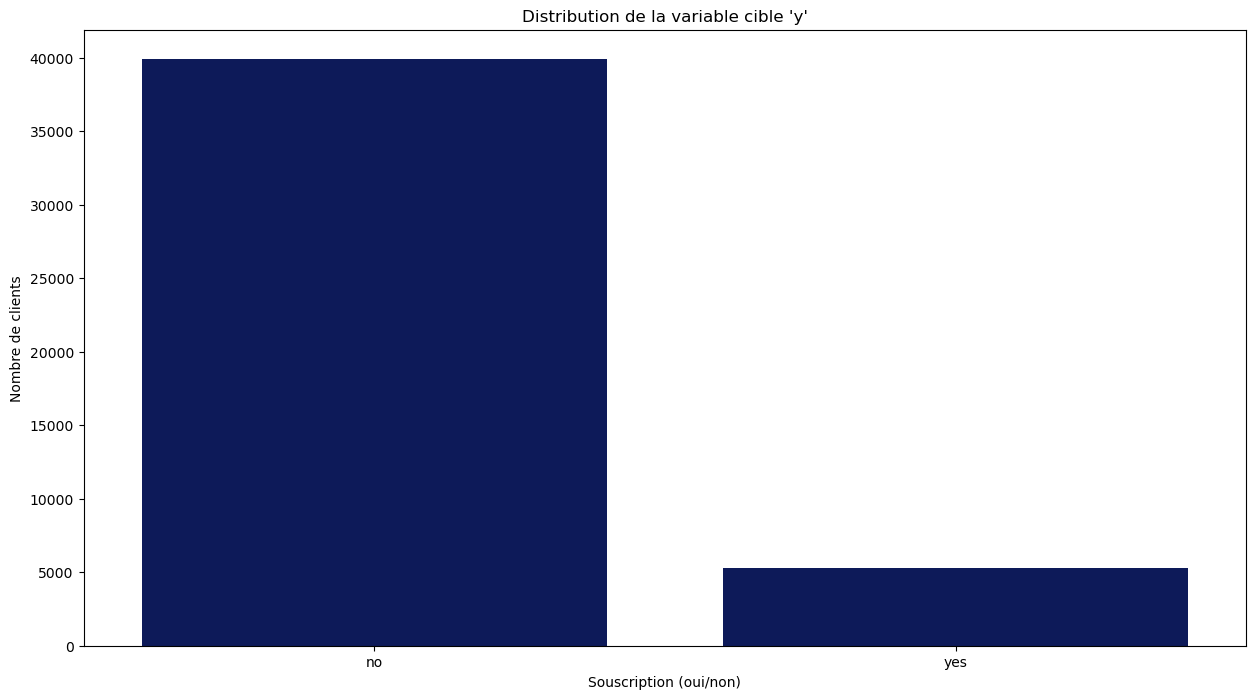

In [3]:
# Visualisation de la distribution de la variable cible 'y'
plt.figure(figsize=(15, 8))
custom_palette = ["#001166", "#F95E4C"]
sns.set_palette(custom_palette)
ax = sns.countplot(x = 'y', data=df)
plt.title("Distribution de la variable cible 'y'")
plt.xlabel("Souscription (oui/non)")
plt.ylabel("Nombre de clients")
plt.show();

Je remarque un déséquilibre sur ma variable "y", ceci est un élément à prendre en compte lors de la prédiction. Puisque le résultat "no" va avoir une influence importante sur celle-ci.
### b. Distribution des variables par rapport à la variable cible "y"
Pour continuer à voir la distribution des autres varaibles, je décide de mettre en contraste la variable cible avec les variables que je dispose.

Variable : "job" : indique le métier du client. Variable catégorielle.

Objectif : Analyser si lemétier à une influence sur la souscription au produit de placement financier.

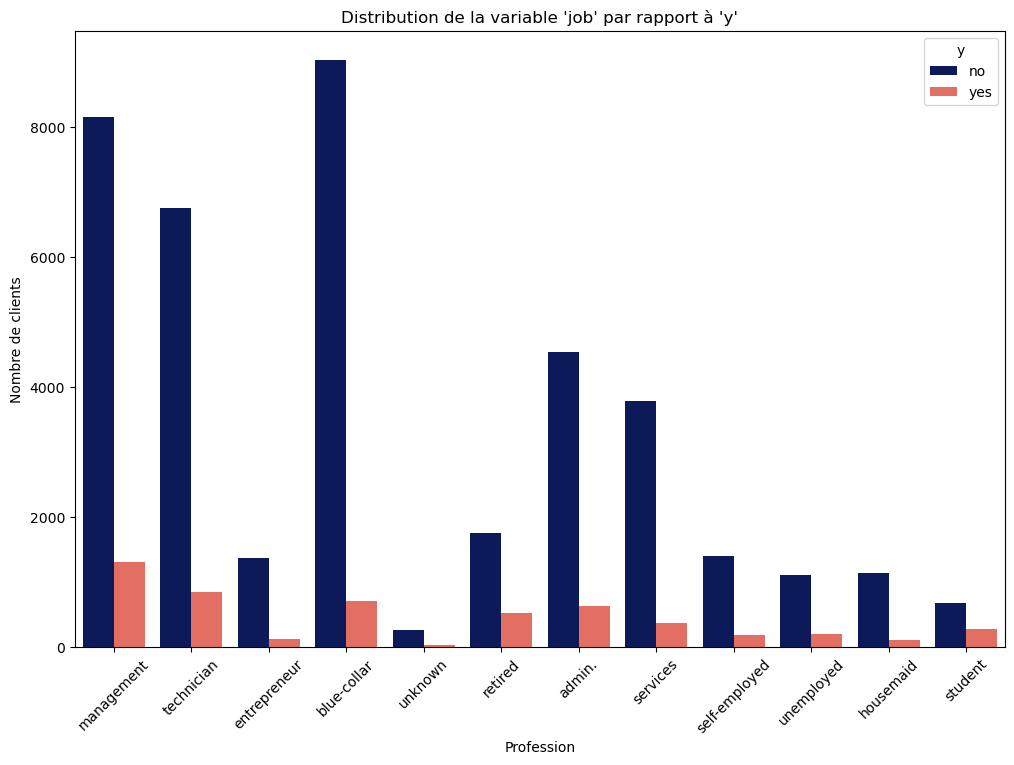

In [4]:
# Visualisation de la relation entre 'job' et 'y'
plt.figure(figsize=(12, 8))
custom_palette = ["#001166", "#F95E4C"]
sns.set_palette(custom_palette)
sns.countplot(x="job", hue="y", data=df)
plt.title("Distribution de la variable 'job' par rapport à 'y'")
plt.xlabel("Profession")
plt.ylabel("Nombre de clients")
plt.xticks(rotation=45)
plt.show();

Je remarque que les clientrs contactés sont principalement des managers, des techniciens, des personnes travaillant dans l'administratifs, des métiers du bâtiment, des retraités.
Cela peut venir du produit de placement proposé aux personnes. Ne connaissant pas les modalités du produit, il est compliqué de déterminer si le produit influe sur la typologie des personnes susceptibles d'être intéressées.

Variable : "marital" : indique la situation damiliale. Variable catégorielle.

Objectif : Analyser si la situation familiale à une influence sur la souscription au produit de placement financier.

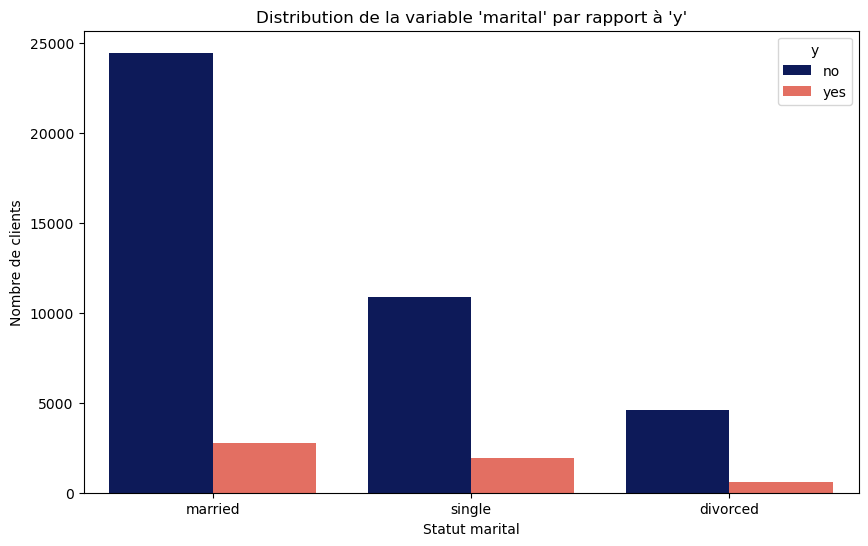

In [5]:
# Visualisation de la relation entre 'marital' et 'y'
plt.figure(figsize=(10, 6))
custom_palette = ["#001166", "#F95E4C"]
sns.set_palette(custom_palette)
sns.countplot(x="marital", hue="y", data=df)
plt.title("Distribution de la variable 'marital' par rapport à 'y'")
plt.xlabel("Statut marital")
plt.ylabel("Nombre de clients")
plt.show();

Je remarque que les personnes ayant souscrit au produit de placement financier, sont majoritairement des personnes mariées ou célibataires.
On peut supposer que les personnes se projetant dans l'avenir et voulant préparer un projet demandant des ressources financières sont plus intéressé par ce type de produit.

Variable : "education" : indique le secteur d'activité. Variable catégorielle.

Objectif : Analyser si le secteur d'activité à une influence sur la souscription au produit de placement financier.

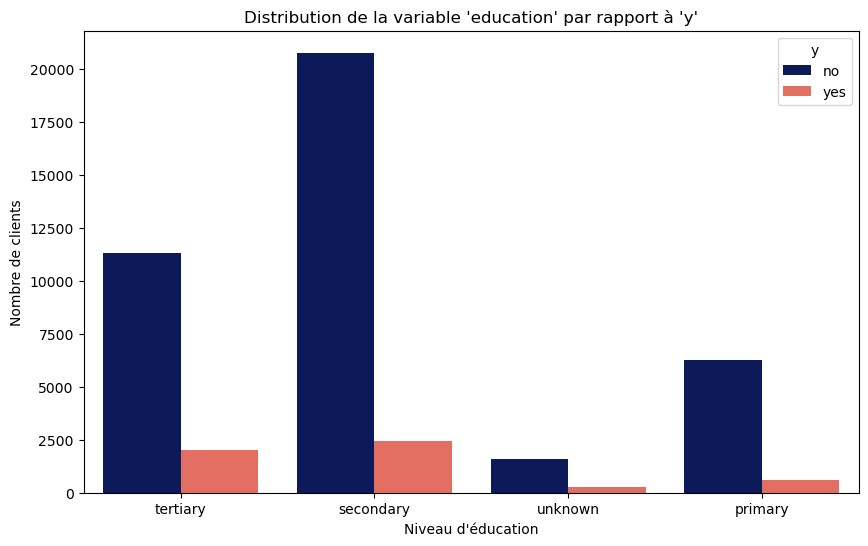

In [6]:
# Visualisation de la relation entre 'education' et 'y'
plt.figure(figsize=(10, 6))
custom_palette = ["#001166", "#F95E4C"]
sns.set_palette(custom_palette)
sns.countplot(x="education", hue="y", data=df)
plt.title("Distribution de la variable 'education' par rapport à 'y'")
plt.xlabel("Niveau d'éducation")
plt.ylabel("Nombre de clients")
plt.show();

Je remarque que les personnes ayant souscrit au produit de placement financier sont principalement des personnes évoluant dans le secteur d'activité secondaire et tertiaire.
Ca rejoins l'observation que j'ai fais précédemment - en effet les métiers observés plus favorable à la souscription du produit correspondent aux mêmes secteurs d'activités.

Variable : "job" vs "age" : indique le métier du client et indique son âge. Variables catégorielles.

Objectif : Analyser la répartition des différents métiers des clients, ainsi que la distribution de l'âge par rapport à la variable cible.

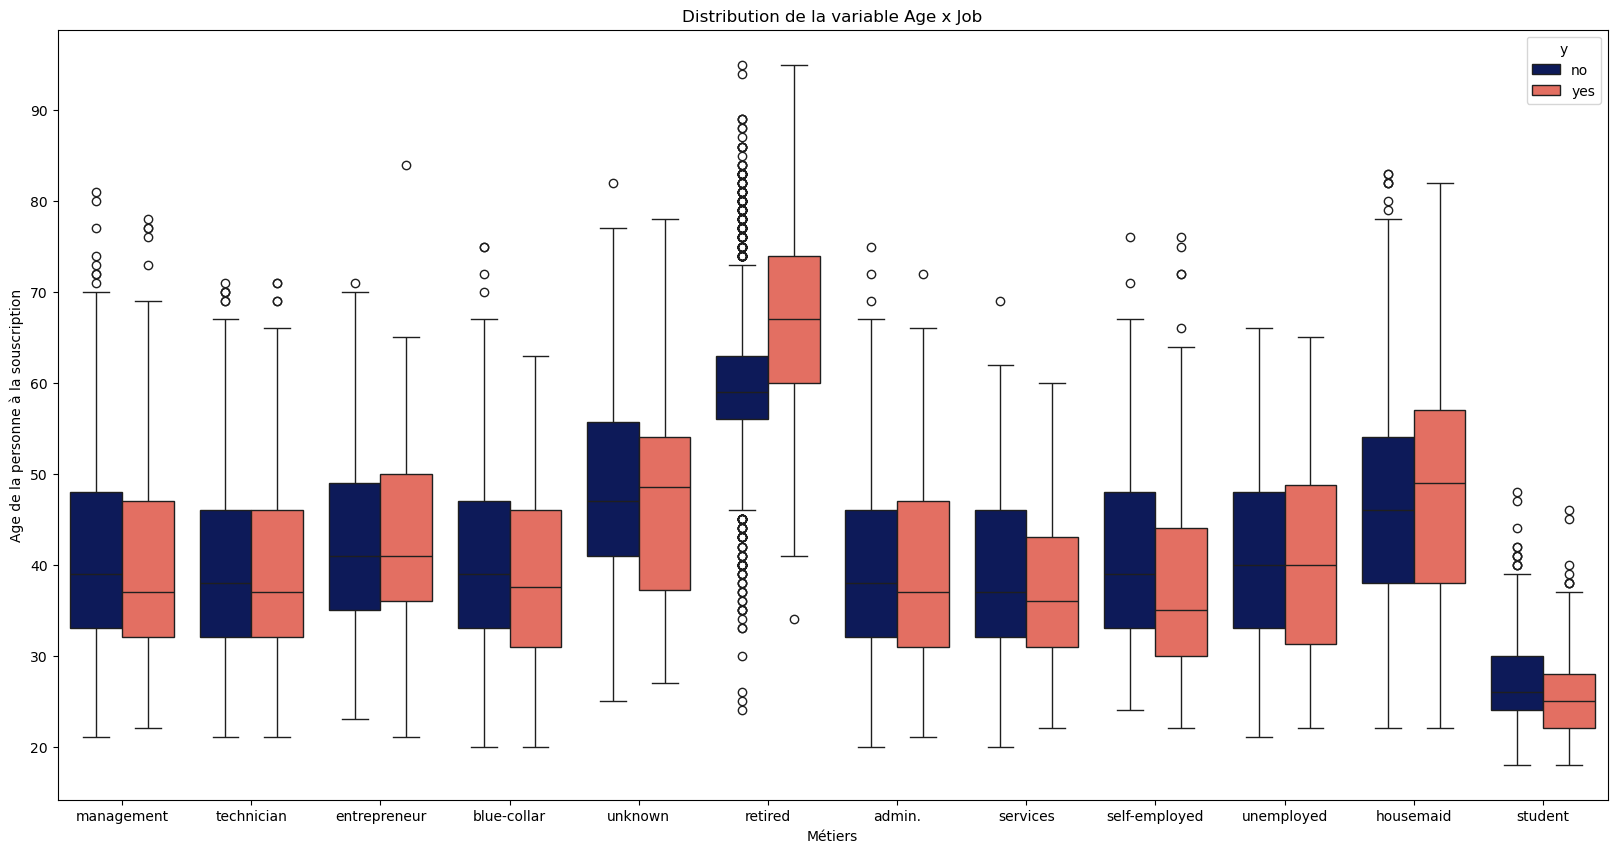

In [7]:
# Création de la figure
fig = plt.figure(figsize = (20, 10))

# Création graphique
sns.set_palette(custom_palette)
sns.boxplot(x = "job", y ="age", hue = "y", data = df)
plt.title("Distribution de la variable Age x Job")
plt.xlabel("Métiers")
plt.ylabel("Age de la personne à la souscription")
plt.show();

Je remarque que l'ensemble des métiers sont équilibrés sur la répartition de l'âge entre les personnes par rapport à la variable cible. Sauf pour les retraités, où je remarque que les jeunes retraités ont tendance à refuser le produit de placement financier.

On peut également observer que l'âge est réparti entre 30 et 50 ans pour les personnes actives. Je pense qu'il s'agit de la tranche d'âge où on est susceptibles de vouloir faire des projets demandant un financement particulier.

Variable : cible vs "age" : indique l'acceptation du produit par le client et son âge. Variables catégorielles.

Objectif : Analyser la répartition de l'âge par rapport à la variable cible. Afin de savoir si le produit intéresse des personnes âgées ou jeunes.

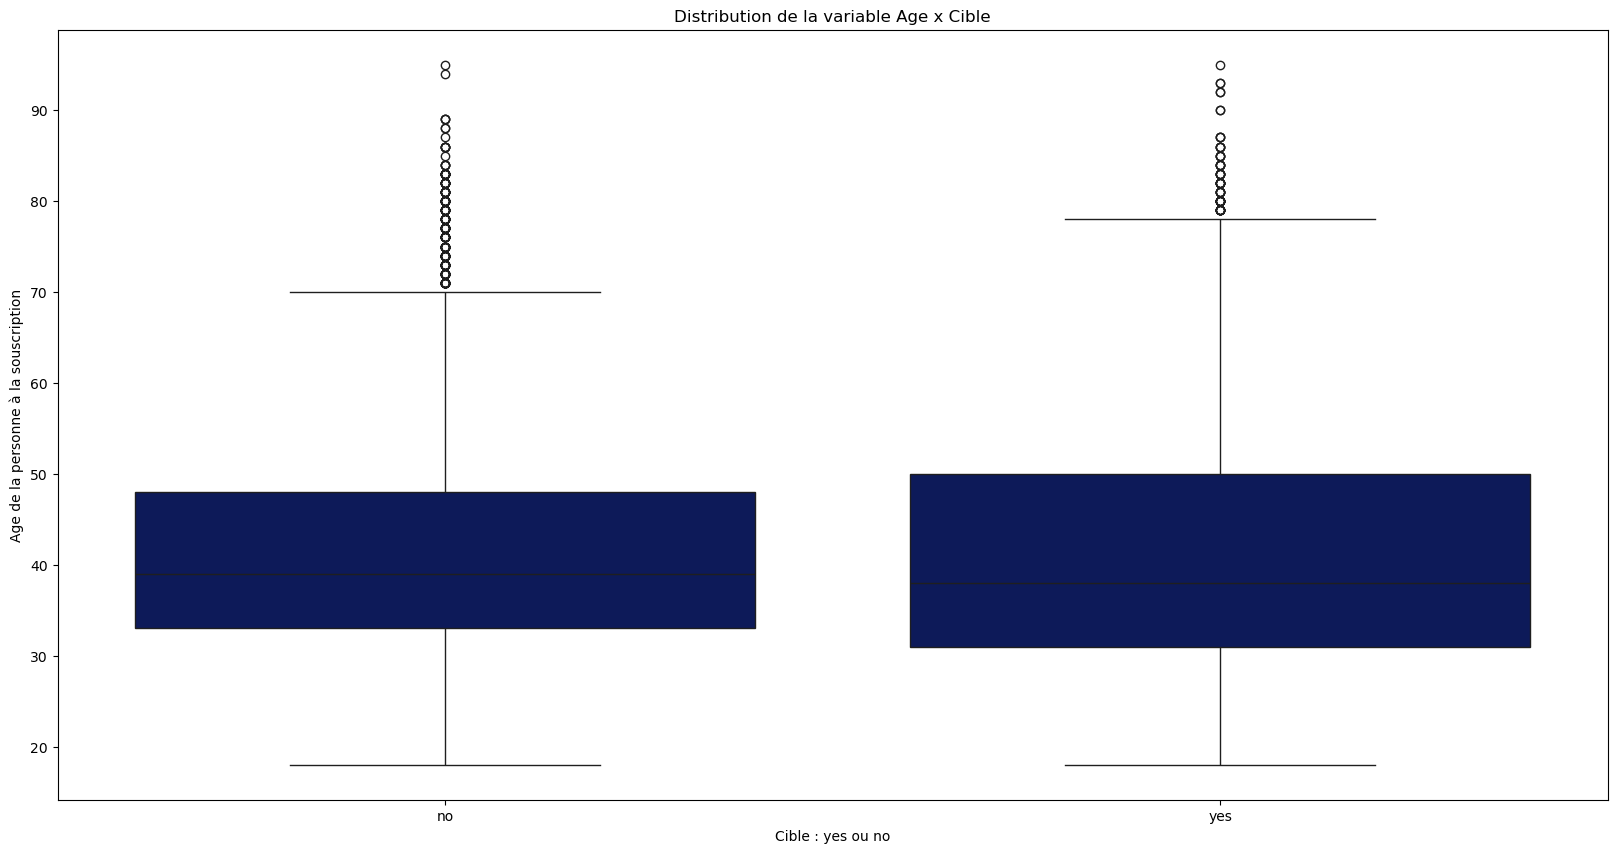

In [8]:
# Création de la figure
fig = plt.figure(figsize = (20, 10))

# Création graphique
sns.set_palette(custom_palette)
sns.boxplot(x = "y", y = "age", data = df)
plt.title("Distribution de la variable Age x Cible")
plt.xlabel("Cible : yes ou no")
plt.ylabel("Age de la personne à la souscription")
plt.show();

La distribution est équilibrée principalement entre 35 et 49 ans pour les refus et entre 30 et 50 ans pour les accepotations.

Comme l'observation précédente, on est sur la tranche d'âge où on est susceptible de construire un projet d'avenir, épargner dans ce cas est une bonne solution pour préparer un futur investissement.

# Machine Learning

L'enjeu est de savoir quelles informations concernant les personnes contactées, permettent de déterminer le choix du client à souscrire ou non au produit de placement. J'ai décidé de garder l'ensemble de toutes les variables disponibles afin d'alimenter au mieux le modèle de machine learning.
Mais pour pouvoir utiliser l'ensemble des données disponibles dans un modèle, il faut convertir les variables de type objet en variable de type numérique.

Je vais donc procéder de la manière suivante pour les variable de type objet :
- La plupart des variables de type objet dans le jeu de donnée, sont des informations binaire "yes" ou "non", par conséquent je passe par encodeur qui va convertir les modalités "yes" et "no" par des valeurs numériques.
- Il y a six variables avec plus de deux modalités, dans la continuité de ce que j'ai fais précédemment, l'encodeur va convertir les modalités par des suites numériques.

### 1. Préparation des données

In [9]:
# Conversion des variables catégoriques en numériques
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

# Traitement des données manquantes
df.fillna(df.mean(), inplace=True)

### 2. Analyse exploratoire

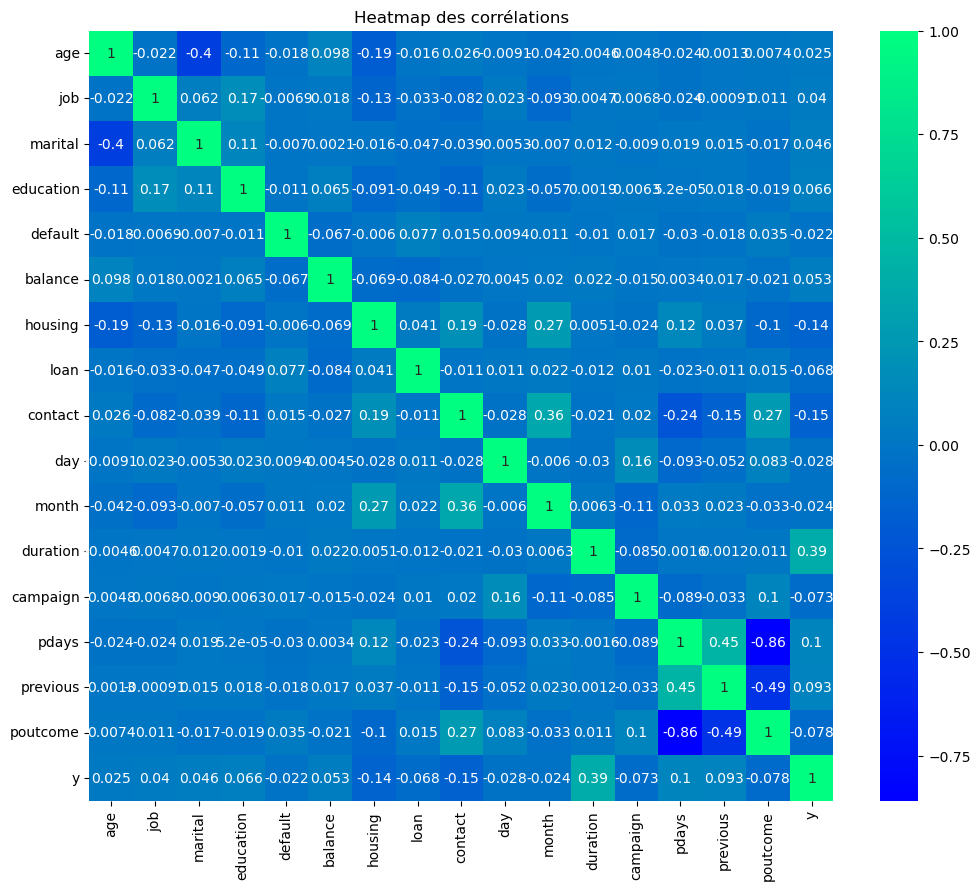

Corrélation Pearson entre 'age' et 'y': 0.025155017088380884
Corrélation Pearson entre 'campaign' et 'y': -0.07317200634586693
Corrélation Pearson entre 'campaign' et 'age': 0.004760311762456934


In [12]:
# Heatmap des corrélations
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='winter')
plt.title('Heatmap des corrélations')
plt.show()

# Test de corrélation de Pearson
corr_age_y = df['age'].corr(df['y'], method='pearson')
print(f"Corrélation Pearson entre 'age' et 'y': {corr_age_y}")

corr_campaign_y = df['campaign'].corr(df['y'], method='pearson')
print(f"Corrélation Pearson entre 'campaign' et 'y': {corr_campaign_y}")

corr_campaign_age = df['campaign'].corr(df['age'], method='pearson')
print(f"Corrélation Pearson entre 'campaign' et 'age': {corr_campaign_age}")

## V. Modélisation
### a. Choix des variables
Afin de faire les tests statistiques, j'ai modifié l'ensemble des variables disponibles de type objet en type numérique. Grâce à cette modification je peux utiliser toutes les données à ma disposition dans des modèles de machine learning.

Par conséquent je décide de conserver l'ensemble des données à ma disposition.

### b. Préparation des données
Les algorithmes de Machine Learning de Python ne peuvent s'appliquer que sur des données de type numérique et ayant une valeur (les valeurs nulles ou manquantes doivent être soit supprimées du DataSet, soit remplacer par une valeur par défaut).

### c. Stockage de la variable cible
Afin d'éviter le surapprentissage dans un modèle supervisé (où nous connaissons la variable cible) je stock la variable cible du jeu de donnée.

### d. Echantillonnage
Je découpe le jeu de donnée comme suit : 
- 80% pour le jeu d'entraînement
- 20% pour le jeu de test

La suite c'est d'utiliser différents modèles de machine learning afin d'étudier les résultats de chacun, pour ensuite faire le choix du résultat le plus intéressant pour le jeu de données. Puis d'optimiser le modèle en ajustant les hypers paramètres.

Le jeu de données étant déséquilibré sur la variable cible, il faut prendre en considération que le modèle sera influencé par le déséquilibre de la variable cible. Pour gérer les problèmes de Classification déséquilibrée, on peut utiliser différentes méthodes que je ne vais pas détailler ici.

Dans mon cas je décide d'utiliser une méthode de sur-échnatillonage : Oversampling. Le but étant d'augmenter le nombre d'observations des classes minoritaires afin d'arriver à un ratio classe minoritaire/ classe majoritaire satisfaisant.

In [13]:
data_ml = df.drop(columns=['y'])
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(data_ml, y, test_size=0.2, random_state=42)

# Oversampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

### a. K les plus proche voisins
Premier modèle de machine learning KNN :


In [14]:
## KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = knn.predict(X_test)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

## Results
display(pd.crosstab(y_test, y_pred_knn, rownames=['Classes réelles'], colnames=['Classes prédites']))

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      7952
           1       0.31      0.62      0.42      1091

    accuracy                           0.79      9043
   macro avg       0.63      0.72      0.64      9043
weighted avg       0.86      0.79      0.82      9043



Classes prédites,0,1
Classes réelles,,
0,6466,1486
1,415,676


J'obtiens un bon score après avoir effectué l'Oversampling.

### b. SVM Pénalisé
Le SVM pénalisé consiste à utiliser une fonction du modèle SVM, qui va directement utiliser un échantillon des données disponibles, pour équilibrer les classes.

In [15]:
## SVM Pénalisé
svm = SVC(gamma='scale', class_weight='balanced', probability=True)
svm.fit(X_train_resampled, y_train_resampled)
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

## Results
display(pd.crosstab(y_test, y_pred_svm, rownames=['Classes réelles'], colnames=['Classes prédites']))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86      7952
           1       0.30      0.69      0.42      1091

    accuracy                           0.77      9043
   macro avg       0.63      0.74      0.64      9043
weighted avg       0.87      0.77      0.81      9043



Classes prédites,0,1
Classes réelles,,
0,6225,1727
1,337,754


Les scores obtenus sont intéressants avec 0.77 d'accuracy.

Pourtant, après avoir échangé avec mon mentor et voulant compléter le tout avec de l'interprétabilité, je découvre un autre modèle de machine learning qui m'a inspiré pour la suite du projet.

### c. XGBoost
Le modèle de machine learning XGBoost est considéré comme un "black-box" par beaucoup étant difficilement interprétable, je vais tout de même essayer dans mon projet d'utiliser cette méthode, de me challenger et d'interpréter les résultats.

Pour commencer je définie un pipeline pour pouvoir appliquer un RandomizedSearchCV pour définir les hyperparamètres les plus adéquats pour utiliser le modèle.

Dans mon pipeline j'intègre également un score d'erreur quadratique moyenne, afin de pouvoir augmenter l'efficacité du choix des hyperparamètres. Ca consolide les projections de prédictions qui sont faites afin d'optimiser au mieux le modèle.

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mean Squared Error: 0.09277894504036271
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7952
           1       0.66      0.47      0.55      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.72      0.75      9043
weighted avg       0.90      0.91      0.90      9043



Classes prédites,0,1
Classes réelles,,
0,7689,263
1,576,515


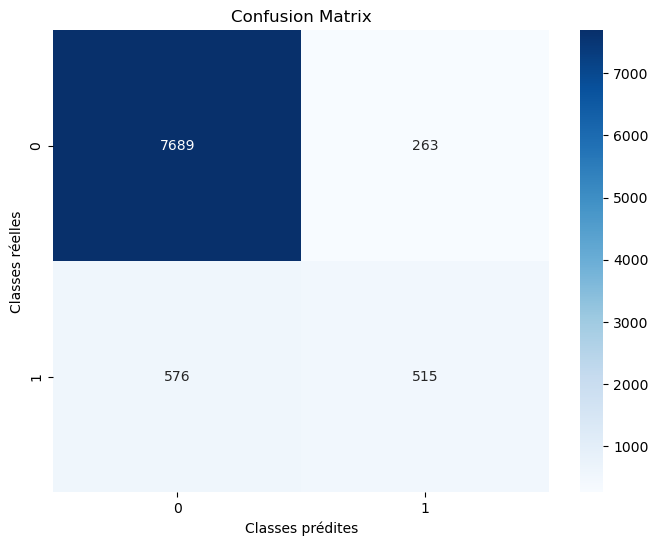

In [19]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data_ml, y, test_size=0.2, random_state=42)

# Définir le pipeline avec GridSearch ou RandomizedSearch

def algorithm_pipeline(X_train, X_test, y_train, y_test, model, param_grid, cv=3):
    """
    Pipeline pour optimiser un modèle avec RandomizedSearch et calculer les prédictions.
    """
    # RandomizedSearch pour hyperparamètres
    randomized_search = RandomizedSearchCV(estimator=model,
                                           param_distributions=param_grid,
                                           scoring='neg_mean_squared_error',
                                           n_iter=50, cv=cv, verbose=2, n_jobs=-1, random_state=42)
    randomized_search.fit(X_train, y_train)
    
    # Meilleur modèle
    best_model = randomized_search.best_estimator_
    
    # Prédictions sur l'ensemble de test
    y_pred = best_model.predict(X_test)
    
    # Calculer le score quadratique moyen
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    
    return best_model, y_pred

# Hyperparamètres pour XGBoost
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialiser le modèle XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)

# Appliquer le pipeline
best_model, y_pred = algorithm_pipeline(X_train, X_test, y_train, y_test, xgb_model, param_dist, cv=5)

# Afficher le rapport de classification
print("Classification Report:\n", classification_report(y_test, y_pred))

# Crosstab pour résultats
display(pd.crosstab(y_test, y_pred, rownames=['Classes réelles'], colnames=['Classes prédites']))

# Afficher une heatmap des résultats
plt.figure(figsize=(8, 6))
sns.heatmap(results, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

J'obtiens un score plus élevé que précédemment et intéressant. C'est pour cette raison que j'ai choisis d'aller jusqu'à l'interprétabilité avec le modèle XGBoost.

# V. Interprétabilité avec SHAP

L'idée est donc d'expliquer, comment une variable peut avoir un impact sur la décision que le modèle va prendre pour faire son choix de Classification. J'ai décidé d'utiliser SHAP qui va permettre d'avoir une approche globale, puis une approche individuelle.

### a. Approche globale

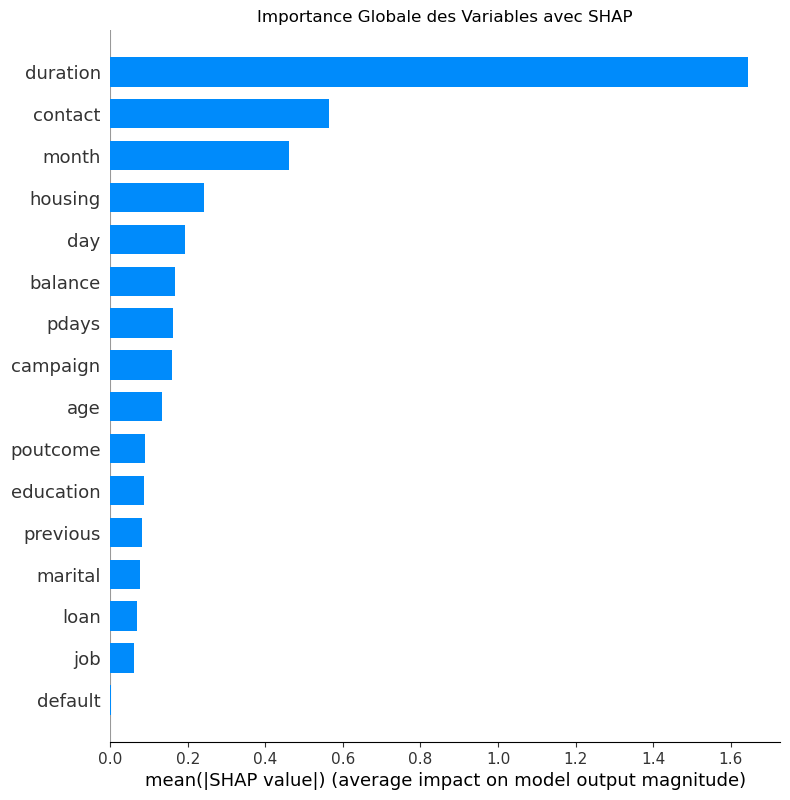

In [20]:
# Utilisation de SHAP pour l'interprétabilité
def plot_shap_summary(model, X_train):
    """
    Génère un graphique SHAP pour l'importance globale des variables.
    """
    # Calculer les valeurs SHAP
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_train)

    # Générer le graphique récapitulatif
    shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
    plt.title('Importance Globale des Variables avec SHAP')
    plt.show()

# Appel de la fonction SHAP
plot_shap_summary(best_model, X_train)

Je constate que la variable "duration" a un impact élevé sur le modèle, plus important que les autres variables. Puis on observe les variables "poutcome", "housing", "contact" et "month" avec un impact sur le modèle plus modéré que la variable "duration".

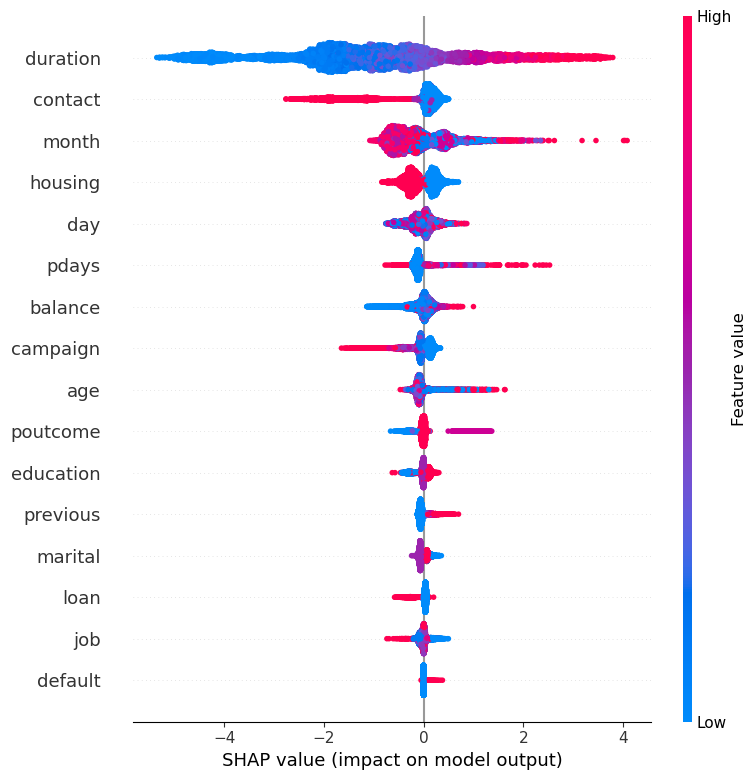

In [21]:
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test)

On peut voir que la variable "duration" a une forte influence sur le modèle, suivi des variables "poutcome", "housing" et "contact".

Ca signifie que si la durée du dépôt est important, alors la personne aura tendance à souscrire. On peut facilement conclure que si le prospect est contacté il y a plus de chance qu'il souscrit au produit.

Dans le second graphique ce qui est intéressant, c'est que si le prospect n'est pas propriétaire il est plus susceptible de souscrire au produit. J'observe cela grâce à la varaible "housing".

Avec SHAP nous pouvons également faire une approche individuelle - en effet cela permet d'identifier un résultat de notre modèle et d'analyser l'impact que chaque variable a eu sur ce résultat seulement.

### b. Approche individuelle

L'approche individuelle permet de comparer deux individus pour voir comment les variables influent sur le modèle.

In [22]:
# Force Plot pour deux individus
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[12,:], X_test.iloc[12,:])
shap.force_plot(explainer.expected_value, shap_values[84,:], X_test.iloc[84,:])

ValueError: visualize() can only display Explanation objects (or arrays of them)!

Le premier exemple, l'individu n° 12 on retrouve nos variables "housing" et "contact" qui influent à la hausse sur le choix du modèle, puis les variables "duration" et "poutcome" qui influent à la baisse sur le choix du modèle.

Le second exemple, l'individu n° 84 on retrouve notre variable "duration" qui influe fortement à la hausse, puis les variables "contact et "month" qui influent à la baisse le choix du modèle.

# VI. Conclusion

Je peux recommander à l'établissement de privilégier des placements financiers long, pour des personnes qui ne sont pas propriétaires, d'un âge entre 30 et 50 ans. Les produits de type PEL ou CEL sont ceux, à ma connaissance, qui seront les plus intéressants à proposer aux prospects au vu de l'interprétabilité du modèle utilisé.

Il semblerait également, qu'il faille contacter les personnes plus d'une fois pour que celle-ci souscrivent au produit de placement financier. On peut imaginer, que les propects ont besoin de temps de réflexion ou d'accompagnement avant de souscrire au produit.

Grâce à ce projet j'ai pu mettre en pratique une bonne partie de ce que j'ai appris lors de ma formation et pouvoir utiliser mes compétences par la suite dans le monde professionnel.